# Import Library dan Dataset

In [ ]:
# Import standard libraries
import zipfile, os
import random
import pandas as pd
import numpy as np
from google.colab import files
import shutil
import pathlib

# Import PIL for image processing
from PIL import Image

# Import matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# import seaborn
import seaborn as sns

# Import TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0, MobileNetV2

# === TensorFlowJS & Model Konversi ===
!pip install tensorflowjs
import tensorflowjs as tfjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.33.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
!pip install kaggle
!chmod 600 /content/kaggle.json

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# STEP 2: Setup Kaggle API
!mkdir -p ~/.kaggle
!echo '{"username":"YOUR_USERNAME","key":"YOUR_KEY"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# STEP 3: Download dataset
!kaggle datasets download -d kmader/food41
!unzip -o food41.zip -d food41_data

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: food41_data/images/tacos/1026681.jpg  
  inflating: food41_data/images/tacos/1030289.jpg  
  inflating: food41_data/images/tacos/1033196.jpg  
  inflating: food41_data/images/tacos/1036030.jpg  
  inflating: food41_data/images/tacos/1042175.jpg  
  inflating: food41_data/images/tacos/1044043.jpg  
  inflating: food41_data/images/tacos/1058697.jpg  
  inflating: food41_data/images/tacos/1059239.jpg  
  inflating: food41_data/images/tacos/1059326.jpg  
  inflating: food41_data/images/tacos/1066762.jpg  
  inflating: food41_data/images/tacos/1070967.jpg  
  inflating: food41_data/images/tacos/1073468.jpg  
  inflating: food41_data/images/tacos/1075296.jpg  
  inflating: food41_data/images/tacos/1085243.jpg  
  inflating: food41_data/images/tacos/108529.jpg  
  inflating: food41_data/images/tacos/1086014.jpg  
  inflating: food41_data/images/tacos/108945.jpg  
  inflating: food41_data/images/tacos/1089575.jpg  
  infla

#EDA

In [ ]:
import os
categories = [folder for folder in os.listdir('/content/food41_data/images') if os.path.isdir(os.path.join('/content/food41_data/images', folder))]
print("Daftar kategori yang tersedia:")
for category in sorted(categories):
    print(category)

Daftar kategori yang tersedia:
apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheese_plate
cheesecake
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
rav

In [ ]:
number_of_classes = len(categories)
print(f"\nNumber of classes: {number_of_classes}")


Number of classes: 101


In [ ]:
import os
import shutil
import random

# Kategori berdasarkan klasifikasi gizi
balanced_categories = [
    "chicken_curry", "fried_rice", "omelette", "pork_chop", "spaghetti_carbonara",
    "ramen", "macaroni_and_cheese", "club_sandwich", "sushi", "lasagna",
    "beet_salad", "bibimbap", "caesar_salad", "caprese_salad", "ceviche",
    "clam_chowder", "crab_cakes", "deviled_eggs", "dumplings", "edamame",
    "eggs_benedict", "falafel", "filet_mignon", "fish_and_chips", "french_onion_soup",
    "grilled_salmon", "greek_salad", "huevos_rancheros", "hummus", "lobster_bisque",
    "miso_soup", "mussels", "paella", "peking_duck", "pho",
    "prime_rib", "ravioli", "red_velvet_cake", "risotto", "samosa",
    "sashimi", "scallops", "seaweed_salad", "shrimp_and_grits", "spring_rolls",
    "steak", "tuna_tartare", "gnocchi"
]


unbalanced_categories = [
    "chicken_wings", "churros", "french_fries", "fried_calamari", "ice_cream",
    "pancakes", "pizza", "spaghetti_bolognese", "tacos", "tiramisu",
    "apple_pie", "baby_back_ribs", "baklava", "beef_carpaccio", "beef_tartare",
    "beignets", "bread_pudding", "breakfast_burrito", "bruschetta", "cannoli",
    "carrot_cake", "cheese_plate", "cheesecake", "chocolate_cake", "chocolate_mousse",
    "croque_madame", "cup_cakes", "donuts", "escargots", "foie_gras",
    "french_toast", "frozen_yogurt", "garlic_bread", "grilled_cheese_sandwich", "guacamole",
    "gyoza", "hamburger", "hot_and_sour_soup", "hot_dog", "lobster_roll_sandwich",
    "macarons", "nachos", "onion_rings", "pad_thai", "panna_cotta",
    "strawberry_shortcake", "takoyaki", "waffles"
]

# Lokasi dataset asli dan direktori tujuan
base_dir = '/content/food41_data/images'  # Ubah sesuai lokasi aslinya
output_dir = 'food101_split_binary'
os.makedirs(output_dir, exist_ok=True)

# Membuat struktur direktori untuk setiap split dan label
splits = ['train', 'val', 'test']
labels = ['seimbang', 'tidak_seimbang']

for split in splits:
    for label in labels:
        os.makedirs(os.path.join(output_dir, f'{split}/{label}'), exist_ok=True)

# Fungsi untuk membagi dan menyalin gambar
def split_dataset(categories, label):
    for category in categories:
        src_dir = os.path.join(base_dir, category)
        if not os.path.exists(src_dir):
            print(f"[!] Folder kategori tidak ditemukan: {category}")
            continue

        all_images = os.listdir(src_dir)
        random.shuffle(all_images)

        total = len(all_images)
        train_count = int(0.75 * total)
        val_count = int(0.10 * total)
        test_count = total - train_count - val_count

        split_counts = {
            'train': train_count,
            'val': val_count,
            'test': test_count
        }

        start_idx = 0
        for split in splits:
            split_path = os.path.join(output_dir, f'{split}/{label}/{category}')
            os.makedirs(split_path, exist_ok=True)
            end_idx = start_idx + split_counts[split]
            for img in all_images[start_idx:end_idx]:
                shutil.copy(os.path.join(src_dir, img), os.path.join(split_path, img))
            print(f"[✓] {category} → {split}/{label} ({split_counts[split]} gambar)")
            start_idx = end_idx

# Jalankan proses untuk dua kategori
split_dataset(balanced_categories, 'seimbang')
split_dataset(unbalanced_categories, 'tidak_seimbang')

print("\n📁 Dataset berhasil dibagi menjadi train (75%), val (10%), dan test (15%).")


[✓] chicken_curry → train/seimbang (750 gambar)
[✓] chicken_curry → val/seimbang (100 gambar)
[✓] chicken_curry → test/seimbang (150 gambar)
[✓] fried_rice → train/seimbang (750 gambar)
[✓] fried_rice → val/seimbang (100 gambar)
[✓] fried_rice → test/seimbang (150 gambar)
[✓] omelette → train/seimbang (750 gambar)
[✓] omelette → val/seimbang (100 gambar)
[✓] omelette → test/seimbang (150 gambar)
[✓] pork_chop → train/seimbang (750 gambar)
[✓] pork_chop → val/seimbang (100 gambar)
[✓] pork_chop → test/seimbang (150 gambar)
[✓] spaghetti_carbonara → train/seimbang (750 gambar)
[✓] spaghetti_carbonara → val/seimbang (100 gambar)
[✓] spaghetti_carbonara → test/seimbang (150 gambar)
[✓] ramen → train/seimbang (750 gambar)
[✓] ramen → val/seimbang (100 gambar)
[✓] ramen → test/seimbang (150 gambar)
[✓] macaroni_and_cheese → train/seimbang (750 gambar)
[✓] macaroni_and_cheese → val/seimbang (100 gambar)
[✓] macaroni_and_cheese → test/seimbang (150 gambar)
[✓] club_sandwich → train/seimbang (7

# Exploratory Data Analysis (EDA)

In [ ]:
import os

# Misal: output_dir = folder tempat train/val/test berada
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            count = sum([len(files) for _, _, files in os.walk(class_path)])
            class_counts[class_name] = count
    return class_counts

# Hitung jumlah gambar per kelas untuk tiap set
train_counts = count_images_per_class(train_dir)
val_counts = count_images_per_class(val_dir)
test_counts = count_images_per_class(test_dir)

# Tampilkan hasil distribusi
print("\nDistribusi Gambar per Kelas:")

print("\nTrain:")
for cls, count in sorted(train_counts.items()):
    print(f"  {cls}: {count} gambar")

print("\nValidasi:")
for cls, count in sorted(val_counts.items()):
    print(f"  {cls}: {count} gambar")

print("\nTest:")
for cls, count in sorted(test_counts.items()):
    print(f"  {cls}: {count} gambar")

# Total keseluruhan
total_train = sum(train_counts.values())
total_val = sum(val_counts.values())
total_test = sum(test_counts.values())
total_all = total_train + total_val + total_test

print(f"\nTotal gambar di train    : {total_train}")
print(f"Total gambar di validasi : {total_val}")
print(f"Total gambar di test     : {total_test}")
print(f"Total seluruh gambar     : {total_all}")



Distribusi Gambar per Kelas:

Train:
  seimbang: 36000 gambar
  tidak_seimbang: 36000 gambar

Validasi:
  seimbang: 4800 gambar
  tidak_seimbang: 4800 gambar

Test:
  seimbang: 7200 gambar
  tidak_seimbang: 7200 gambar

Total gambar di train    : 72000
Total gambar di validasi : 9600
Total gambar di test     : 14400
Total seluruh gambar     : 96000


<ipython-input-9-b78b1e95220f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=labels, x=values, ax=axes[i], palette="viridis")
<ipython-input-9-b78b1e95220f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=labels, x=values, ax=axes[i], palette="viridis")
<ipython-input-9-b78b1e95220f>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=labels, x=values, ax=axes[i], palette="viridis")


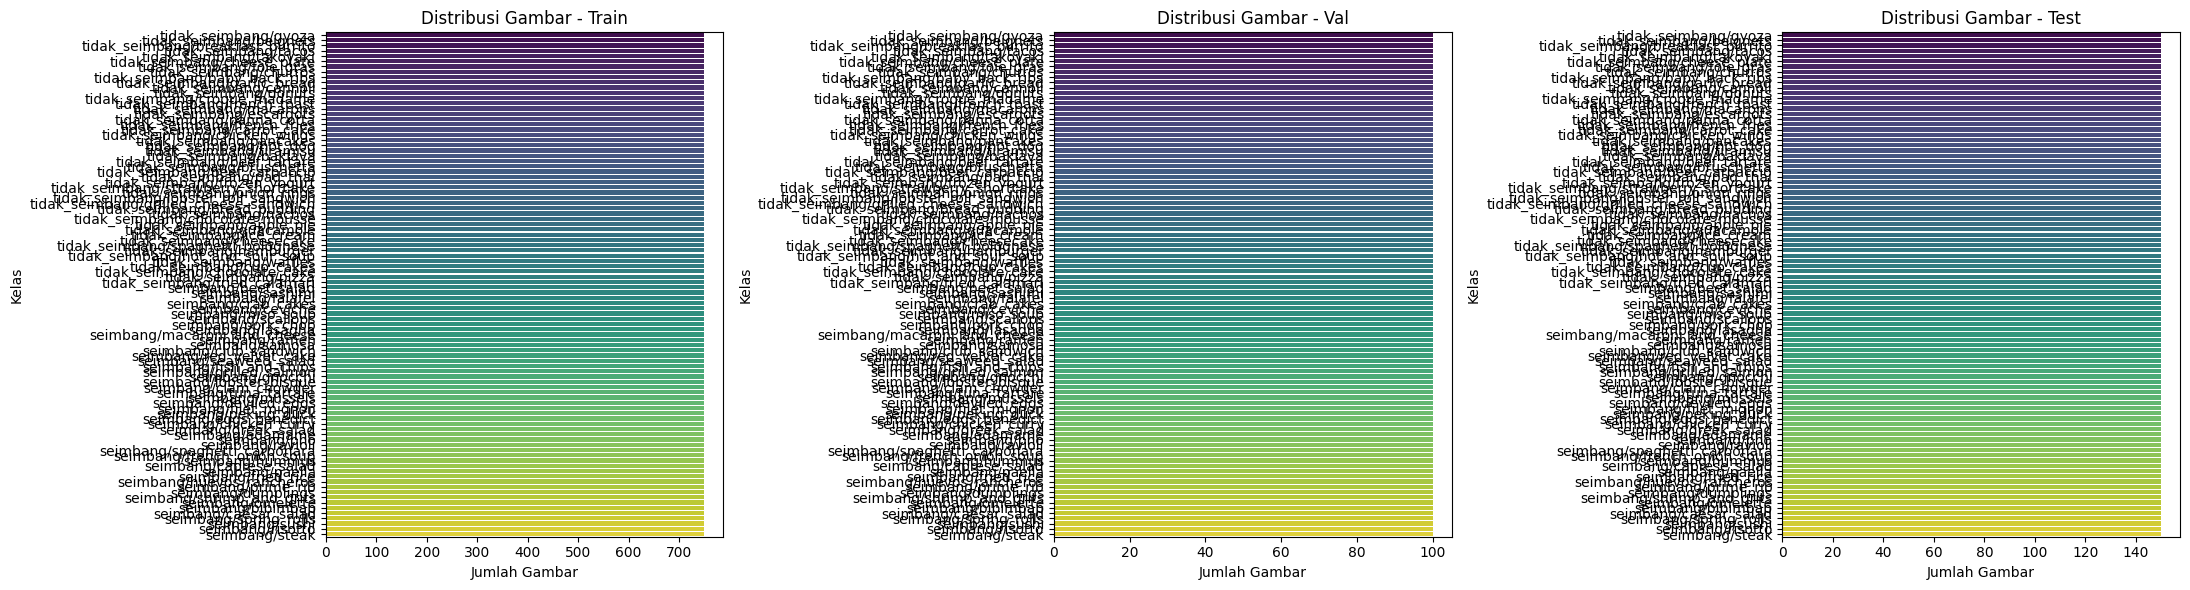

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Path ke folder utama
base_dir = "food101_split_binary"  # Ganti ini jika perlu
splits = ['train', 'val', 'test']

# Fungsi untuk menghitung jumlah gambar per subfolder dalam kategori
def count_images_nested(base_path):
    counts = {}
    for kategori in os.listdir(base_path):  # seimbang / tidak_seimbang
        kategori_path = os.path.join(base_path, kategori)
        if os.path.isdir(kategori_path):
            for sub_kelas in os.listdir(kategori_path):  # misalnya chicken_curry
                sub_kelas_path = os.path.join(kategori_path, sub_kelas)
                if os.path.isdir(sub_kelas_path):
                    jumlah = len([
                        f for f in os.listdir(sub_kelas_path)
                        if os.path.isfile(os.path.join(sub_kelas_path, f))
                    ])
                    label = f"{kategori}/{sub_kelas}"
                    counts[label] = jumlah
    return counts

# Kumpulkan jumlah gambar per split
split_counts = {}
for split in splits:
    split_path = os.path.join(base_dir, split)
    split_counts[split] = count_images_nested(split_path)

# Visualisasi
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
for i, split in enumerate(splits):
    labels = list(split_counts[split].keys())
    values = list(split_counts[split].values())
    sns.barplot(y=labels, x=values, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribusi Gambar - {split.capitalize()}')
    axes[i].set_xlabel('Jumlah Gambar')
    axes[i].set_ylabel('Kelas')

plt.tight_layout()
plt.show()


# Data Augmentasi

In [ ]:
import os
import pandas as pd

# Direktori dataset
base_dir = 'food101_split_binary'

# Fungsi untuk menghitung jumlah gambar per kategori, termasuk subfolder
def get_dataset_summary(directory):
    summary = []
    for split in ['train', 'val', 'test']:
        for label in ['seimbang', 'tidak_seimbang']:
            path = os.path.join(directory, split, label)
            num_images = 0
            if os.path.exists(path):
                # Iterasi melalui semua subfolder di dalam folder label (misalnya 'chicken_curry')
                for subfolder in os.listdir(path):
                    subfolder_path = os.path.join(path, subfolder)
                    if os.path.isdir(subfolder_path):
                        # Hitung jumlah file gambar di dalam subfolder
                        num_images += len([f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
            summary.append({'split': split, 'label': label, 'num_images': num_images})
    return pd.DataFrame(summary)

# Jalankan fungsi
df_summary = get_dataset_summary(base_dir)
print("Ringkasan Dataset:")
print(df_summary)

Ringkasan Dataset:
   split           label  num_images
0  train        seimbang       36000
1  train  tidak_seimbang       36000
2    val        seimbang        4800
3    val  tidak_seimbang        4800
4   test        seimbang        7200
5   test  tidak_seimbang        7200


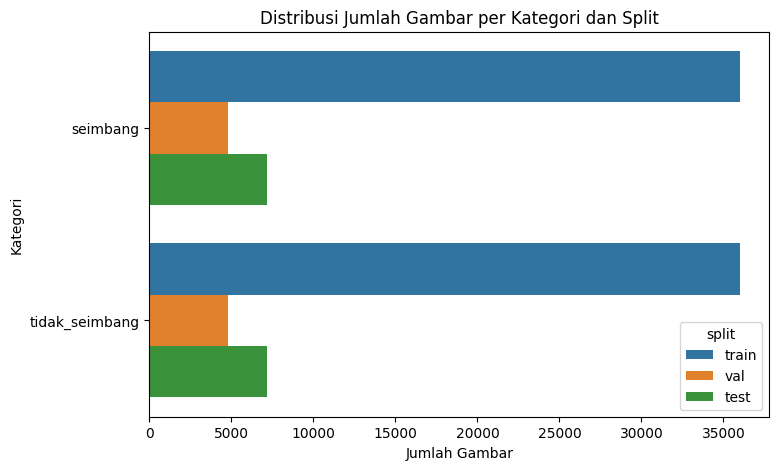

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi gambar
plt.figure(figsize=(8, 5))
sns.barplot(data=df_summary, x='num_images', y='label', hue='split')
plt.title('Distribusi Jumlah Gambar per Kategori dan Split')
plt.xlabel('Jumlah Gambar')
plt.ylabel('Kategori')
plt.show()

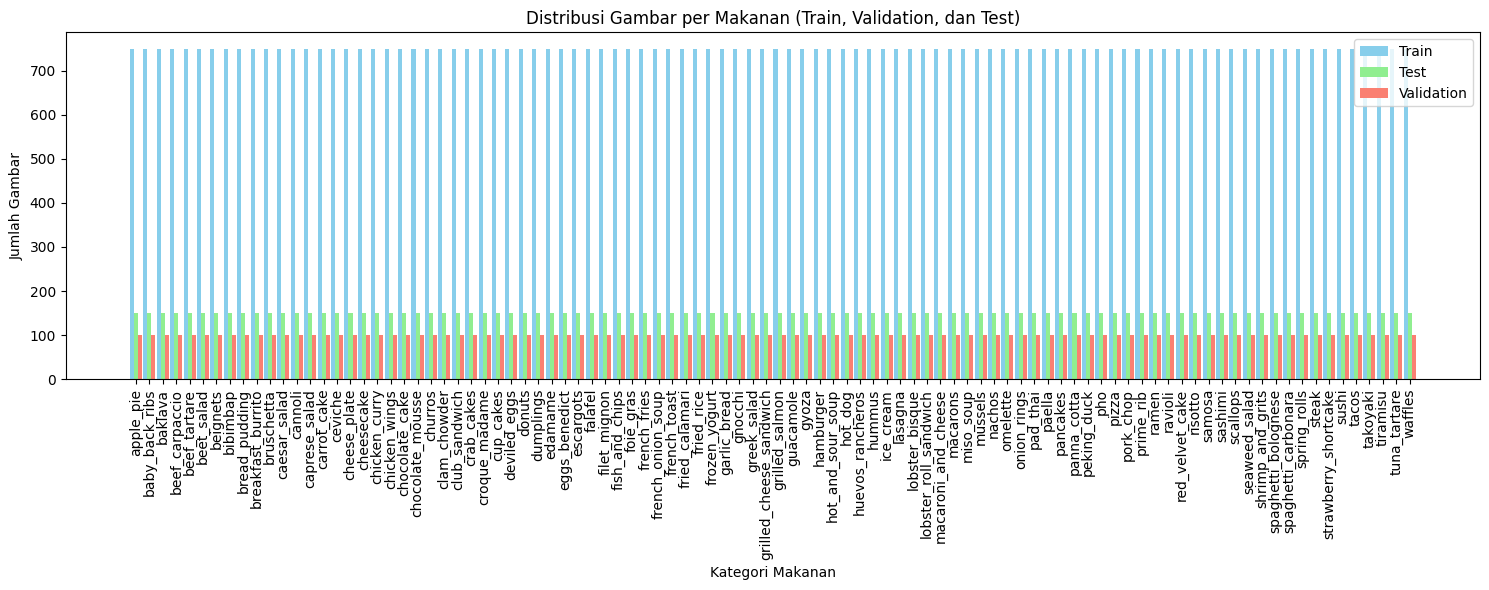

In [ ]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

# Direktori dataset yang sudah dikelompokkan
output_dir = 'food101_split_binary'

# Fungsi untuk menghitung jumlah gambar per kategori
def count_images_per_category(base_dir, split='train'):
    counts = defaultdict(int)
    labels = ['seimbang', 'tidak_seimbang']

    for label in labels:
        label_dir = os.path.join(base_dir, split, label)
        if not os.path.exists(label_dir):
            print(f"Direktori {label_dir} tidak ditemukan!")
            continue
        # Dapatkan semua subfolder kategori makanan
        categories = [d for d in os.listdir(label_dir) if os.path.isdir(os.path.join(label_dir, d))]
        for category in categories:
            category_dir = os.path.join(label_dir, category)
            num_images = len([f for f in os.listdir(category_dir) if f.endswith('.jpg')])
            counts[category] += num_images

    return counts

# Hitung distribusi untuk train, val, dan test
train_counts = count_images_per_category(output_dir, 'train')
val_counts = count_images_per_category(output_dir, 'val')
test_counts = count_images_per_category(output_dir, 'test')

# Gabungkan data untuk visualisasi
categories = sorted(set(list(train_counts.keys()) + list(val_counts.keys()) + list(test_counts.keys())))
train_data = [train_counts.get(cat, 0) for cat in categories]
test_data = [test_counts.get(cat, 0) for cat in categories]
val_data = [val_counts.get(cat, 0) for cat in categories]

# Visualisasi: Grafik Batang (Bar Chart)
fig, ax = plt.subplots(figsize=(15, 6))
bar_width = 0.3  # Sedikit diperkecil karena ada 3 bar
x = range(len(categories))


# Plot bar untuk train, test, dan val
plt.bar(x, train_data, bar_width, label='Train', color='skyblue')
plt.bar([i + bar_width for i in x], test_data, bar_width, label='Test', color='lightgreen')
plt.bar([i + 2 * bar_width for i in x], val_data, bar_width, label='Validation', color='salmon')


# Atur label dan judul
plt.xlabel('Kategori Makanan')
plt.ylabel('Jumlah Gambar')
plt.title('Distribusi Gambar per Makanan (Train, Validation, dan Test)')
plt.xticks([i + bar_width for i in x], categories, rotation=90)
plt.legend()

# Atur layout agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

In [ ]:
from PIL import Image
import random
import os
import pandas as pd

# Fungsi untuk mengumpulkan informasi gambar
def collect_image_info(directory, num_samples=1000):
    info = []
    for split in ['train', 'test', 'val']:  # Tambahkan 'test' ke daftar split
        for label in ['seimbang', 'tidak_seimbang']:
            label_path = os.path.join(directory, split, label)
            if not os.path.exists(label_path):
                print(f"Direktori {label_path} tidak ditemukan!")
                continue

            # Dapatkan semua subfolder kategori makanan
            categories = [d for d in os.listdir(label_path) if os.path.isdir(os.path.join(label_path, d))]

            for category in categories:
                path = os.path.join(label_path, category)
                images = [f for f in os.listdir(path) if f.endswith('.jpg')]  # Pastikan hanya file gambar
                if len(images) == 0:
                    continue
                sampled_images = random.sample(images, min(num_samples, len(images)))

                for img_name in sampled_images:
                    try:
                        img_path = os.path.join(path, img_name)
                        with Image.open(img_path) as img:
                            width, height = img.size
                            mode = img.mode
                            info.append({
                                'split': split,
                                'label': label,
                                'category': category,  # Tambahkan informasi kategori
                                'filename': img_name,
                                'width': width,
                                'height': height,
                                'mode': mode
                            })
                    except Exception as e:
                        info.append({
                            'split': split,
                            'label': label,
                            'category': category,  # Tambahkan informasi kategori
                            'filename': img_name,
                            'width': None,
                            'height': None,
                            'mode': 'corrupted'
                        })

    return pd.DataFrame(info)

# Jalankan fungsi
base_dir = 'food101_split_binary'  # Sesuaikan dengan direktori yang benar
df_images = collect_image_info(base_dir)
print("Informasi Gambar (Sampel):")
print(df_images.head())

# Statistik dimensi
print("\nStatistik Dimensi Gambar:")
print(df_images.groupby(['split', 'label', 'category'])[['width', 'height']].describe())

# Cek gambar korup
corrupted_images = df_images[df_images['mode'] == 'corrupted']
print(f"\nJumlah Gambar Korup: {len(corrupted_images)}")
if len(corrupted_images) > 0:
    print("Gambar Korup:")
    print(corrupted_images[['split', 'label', 'category', 'filename']])

Informasi Gambar (Sampel):
   split     label    category     filename  width  height mode
0  train  seimbang  beet_salad  1148191.jpg    512     339  RGB
1  train  seimbang  beet_salad   472110.jpg    512     512  RGB
2  train  seimbang  beet_salad  1080241.jpg    512     384  RGB
3  train  seimbang  beet_salad  3378227.jpg    512     512  RGB
4  train  seimbang  beet_salad    26609.jpg    384     512  RGB

Statistik Dimensi Gambar:
                                           width                         \
                                           count        mean        std   
split label          category                                             
test  seimbang       beet_salad            150.0  502.626667  36.305295   
                     bibimbap              150.0  500.713333  39.220139   
                     caesar_salad          150.0  496.006667  43.711915   
                     caprese_salad         150.0  499.840000  41.158897   
                     ceviche         

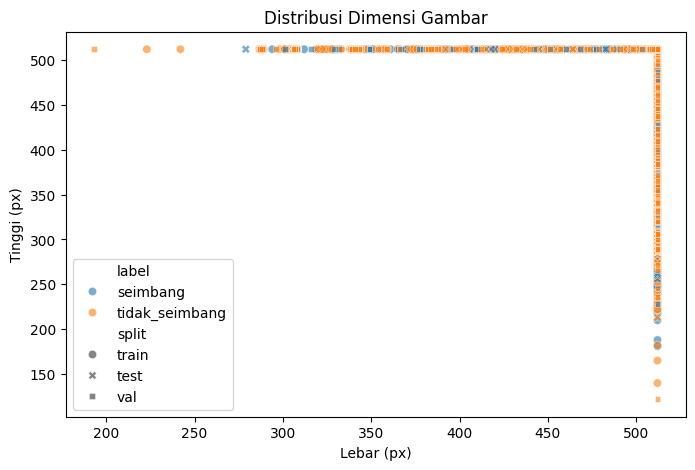

In [ ]:
# Visualisasi distribusi dimensi
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_images, x='width', y='height', hue='label', style='split', alpha=0.6)
plt.title('Distribusi Dimensi Gambar')
plt.xlabel('Lebar (px)')
plt.ylabel('Tinggi (px)')
plt.show()

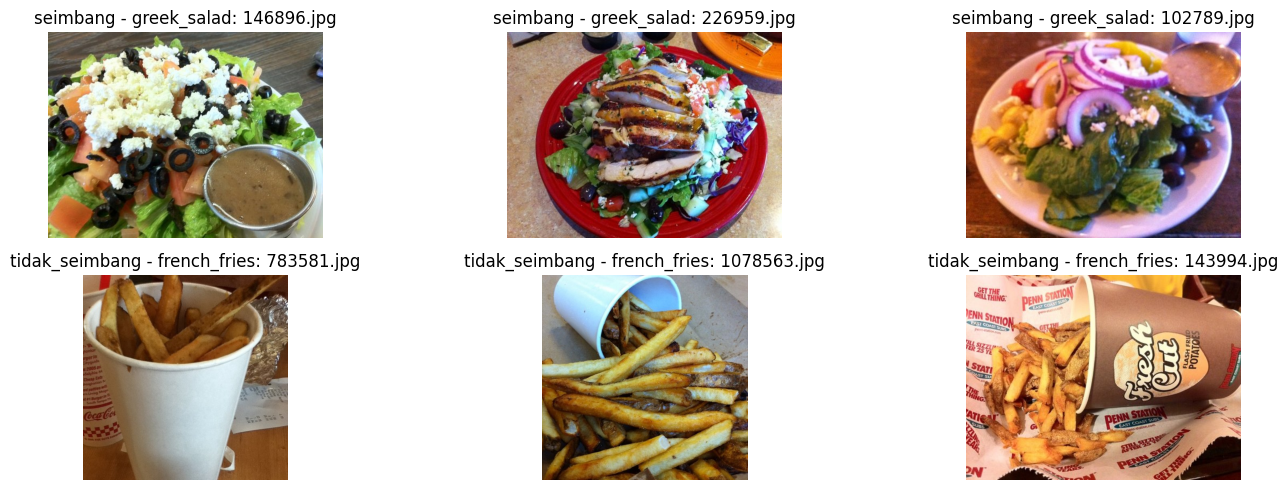

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import random

# Fungsi untuk menampilkan sampel gambar
def display_sample_images(directory, num_samples=3):
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 5))
    labels = ['seimbang', 'tidak_seimbang']

    for i, label in enumerate(labels):
        label_path = os.path.join(directory, 'train', label)
        if not os.path.exists(label_path):
            print(f"Direktori {label_path} tidak ditemukan!")
            continue

        # Dapatkan semua subfolder kategori makanan
        categories = [d for d in os.listdir(label_path) if os.path.isdir(os.path.join(label_path, d))]
        if not categories:
            print(f"Tidak ada kategori di {label_path}!")
            continue

        # Pilih satu kategori secara acak untuk setiap label
        selected_category = random.choice(categories)
        category_path = os.path.join(label_path, selected_category)
        images = [f for f in os.listdir(category_path) if f.endswith('.jpg')]

        if len(images) == 0:
            print(f"Tidak ada gambar di {category_path}!")
            continue

        sampled_images = random.sample(images, min(num_samples, len(images)))

        for j, img_name in enumerate(sampled_images):
            img_path = os.path.join(category_path, img_name)
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"{label} - {selected_category}: {img_name}")
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Jalankan fungsi
base_dir = 'food101_split_binary'  # Sesuaikan dengan direktori yang benar
display_sample_images(base_dir)

Statistik Ukuran File Gambar (KB):
                                           count       mean        std  \
split label          category                                            
train seimbang       beet_salad            750.0  50.953964  14.353383   
                     bibimbap              750.0  54.920629  13.936811   
                     caesar_salad          750.0  53.881867  13.939673   
                     caprese_salad         750.0  49.885922  13.975993   
                     ceviche               750.0  49.527798  14.853729   
...                                          ...        ...        ...   
val   tidak_seimbang strawberry_shortcake  100.0  44.993018  11.630441   
                     tacos                 100.0  54.115889  13.156064   
                     takoyaki              100.0  54.912676  16.231586   
                     tiramisu              100.0  51.205391  15.000347   
                     waffles               100.0  53.298232  18.469699   

  

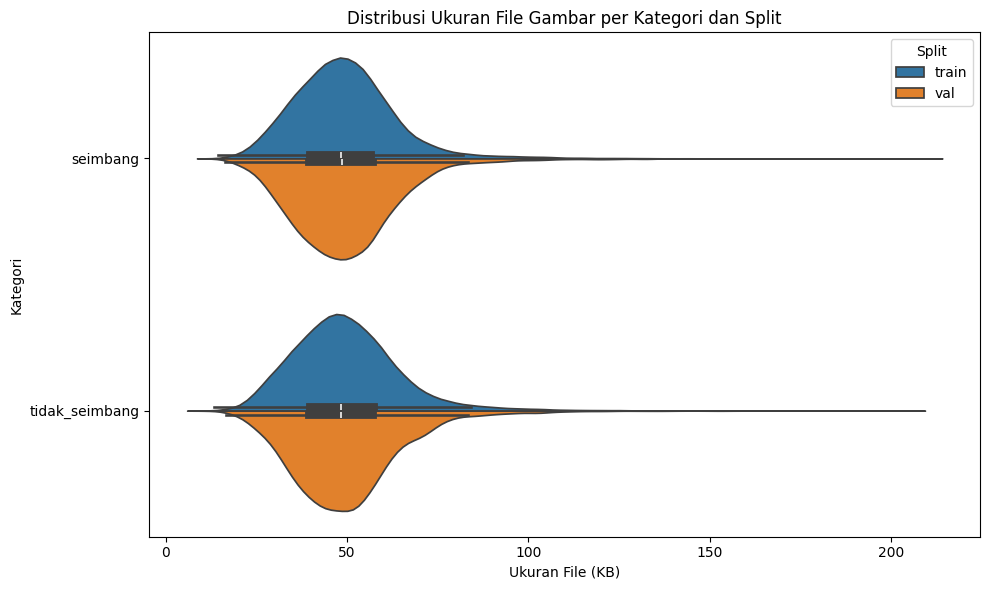

In [ ]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk mengumpulkan ukuran file gambar
def calculate_file_size(directory, num_samples=1000):
    file_size_data = []
    for split in ['train', 'val']:
        for label in ['seimbang', 'tidak_seimbang']:
            label_path = os.path.join(directory, split, label)
            if not os.path.exists(label_path):
                print(f"Direktori {label_path} tidak ditemukan!")
                continue

            # Dapatkan semua subfolder kategori makanan
            categories = [d for d in os.listdir(label_path) if os.path.isdir(os.path.join(label_path, d))]
            if not categories:
                print(f"Tidak ada kategori di {label_path}!")
                continue

            for category in categories:
                category_path = os.path.join(label_path, category)
                images = [f for f in os.listdir(category_path) if f.endswith('.jpg')]
                if len(images) == 0:
                    continue
                sampled_images = random.sample(images, min(num_samples, len(images)))

                for img_name in sampled_images:
                    try:
                        img_path = os.path.join(category_path, img_name)
                        file_size = os.path.getsize(img_path) / 1024  # Ukuran dalam KB
                        file_size_data.append({
                            'split': split,
                            'label': label,
                            'category': category,  # Tambahkan informasi kategori
                            'file_size_kb': file_size
                        })
                    except Exception as e:
                        print(f"Error memproses {img_path}: {e}")
                        continue

    return pd.DataFrame(file_size_data)

# Jalankan fungsi
base_dir = 'food101_split_binary'  # Sesuaikan dengan direktori yang benar
df_file_size = calculate_file_size(base_dir)
print("Statistik Ukuran File Gambar (KB):")
print(df_file_size.groupby(['split', 'label', 'category'])['file_size_kb'].describe())

# Visualisasi distribusi ukuran file
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_file_size, x='file_size_kb', y='label', hue='split', split=True)
plt.title('Distribusi Ukuran File Gambar per Kategori dan Split')
plt.xlabel('Ukuran File (KB)')
plt.ylabel('Kategori')
plt.legend(title='Split')
plt.tight_layout()
plt.show()

# Augmentasi

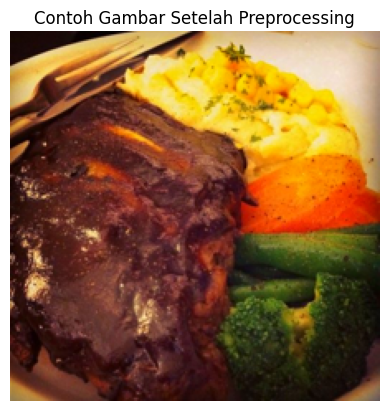

In [ ]:
from PIL import Image, ImageEnhance
import numpy as np

def clean_image(image_path, target_size=(224, 224), saturation_factor=1.5):
    img = Image.open(image_path).convert('RGB')
    img_resized = img.resize(target_size)
    enhancer = ImageEnhance.Color(img_resized)
    img_enhanced = enhancer.enhance(saturation_factor)
    img_array = np.array(img_enhanced) / 255.0
    return img_array

# Contoh uji coba membersihkan satu gambar
sample_path = '/content/food41_data/images/baby_back_ribs/1007102.jpg'  # pastikan file ini ada
cleaned = clean_image(sample_path)

import matplotlib.pyplot as plt
plt.imshow(cleaned)
plt.title("Contoh Gambar Setelah Preprocessing")
plt.axis('off')
plt.show()


## **Modelling**


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Gunakan folder hasil split sebelumnya
final_train_dir = '/content/food101_split_binary/train'
val_dir = '/content/food101_split_binary/val'
test_dir = '/content/food101_split_binary/test'

# --- ImageDataGenerator Setup ---

target_size = (150, 150)
batch_size = 32

# Augmentasi untuk data latih
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generator untuk data validasi dan uji
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow dari folder ke generator
train_generator = train_datagen.flow_from_directory(
    final_train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 72000 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.
Found 14400 images belonging to 2 classes.


In [ ]:
# Menampilkan kelas-kelas yang terdapat dalam dataset
print("Kelas-kelas dalam dataset:")
for class_name, index in train_generator.class_indices.items():
    print(f"{index}: {class_name}")

Kelas-kelas dalam dataset:
0: seimbang
1: tidak_seimbang


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load base model MobileNetV2 tanpa top layers
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

# Bekukan beberapa layer awal
for layer in base_model.layers[:100]:  # Misal bekukan 100 layer pertama
    layer.trainable = False

# Tambahkan custom top layers
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)

# Output layer (jumlah kelas disesuaikan)
num_classes = len(train_generator.class_indices)
predictions = Dense(num_classes, activation='softmax')(x)

# Gabungkan ke model akhir
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

<ipython-input-20-df80f7786bd4>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 3,018,274 (11.51 MB)

 Trainable params: 2,621,730 (10.00 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [ ]:
# Kompilasi model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
save_best = ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

stop_early = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
    mode='max',
    baseline=0.96
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[stop_early]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 671s 285ms/step - accuracy: 0.6128 - loss: 0.6682 - val_accuracy: 0.7482 - val_loss: 0.5064
Epoch 2/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 632s 281ms/step - accuracy: 0.7545 - loss: 0.5100 - val_accuracy: 0.7683 - val_loss: 0.4712
Epoch 3/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 627s 279ms/step - accuracy: 0.7863 - loss: 0.4590 - val_accuracy: 0.7862 - val_loss: 0.4511
Epoch 4/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 606s 269ms/step - accuracy: 0.8098 - loss: 0.4182 - val_accuracy: 0.7954 - val_loss: 0.4367
Epoch 5/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 578s 257ms/step - accuracy: 0.8252 - loss: 0.3867 - val_accuracy: 0.8123 - val_loss: 0.4124
Epoch 6/50
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 644s 286ms/step - accuracy: 0.8394 - loss: 0.3602 - val_accuracy: 0.8097 - val_loss: 0.4143


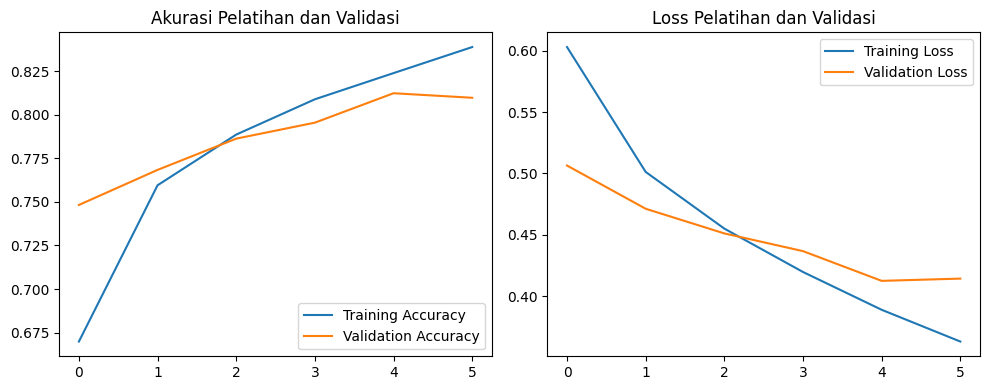

In [ ]:
# Misalnya history adalah hasil dari model.fit(...)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot Akurasi
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.tight_layout()
plt.show()

450/450 ━━━━━━━━━━━━━━━━━━━━ 49s 109ms/step - accuracy: 0.8410 - loss: 0.3719

 Test Accuracy: 81.01%
 Test Loss: 0.4128



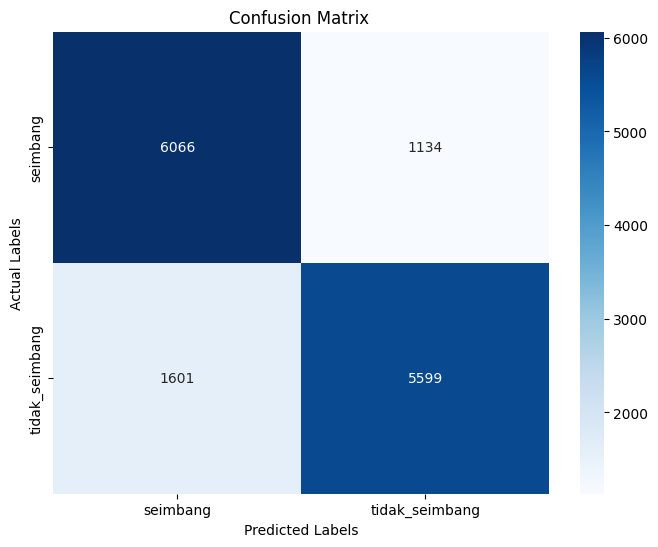

 Classification Report:
                precision    recall  f1-score   support

      seimbang     0.7912    0.8425    0.8160      7200
tidak_seimbang     0.8316    0.7776    0.8037      7200

      accuracy                         0.8101     14400
     macro avg     0.8114    0.8101    0.8099     14400
  weighted avg     0.8114    0.8101    0.8099     14400



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Reset test generator untuk memastikan evaluasi dari awal
test_generator.reset()

# Evaluasi model
loss, accuracy = model.evaluate(test_generator)
print(f"\n Test Accuracy: {accuracy*100:.2f}%")
print(f" Test Loss: {loss:.4f}\n")

# Prediksi kelas
preds = model.predict(test_generator, verbose=0)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix ")
plt.show()

# Classification Report
print(" Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels, digits=4))

In [ ]:
from google.colab import files

model.save('model.h5')
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Muat model .h5
model = tf.keras.models.load_model('model.h5')

# Simpan ke format SavedModel menggunakan tf.saved_model.save
saved_model_path = '/content/saved_model'
tf.saved_model.save(model, saved_model_path)

# Kompres folder SavedModel jadi zip
shutil.make_archive('saved_model', 'zip', saved_model_path)

# Download file zip
files.download('saved_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Memuat model Keras
model = tf.keras.models.load_model('model.h5')

# Konversi ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Pastikan direktori tujuan ada
os.makedirs('/content/tflite', exist_ok=True)

# Simpan model TensorFlow Lite
tflite_model_path = '/content/tflite/model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

# Simpan label
label_path = '/content/tflite/label1.txt'
with open(label_path, 'w') as f:
    f.write("0: Seimbang\n1: Tidak_seimbang")

print("Model berhasil dikonversi dan disimpan ke TensorFlow Lite ")

# Download file TFLite dan label
files.download(tflite_model_path)
files.download(label_path)

Saved artifact at '/tmp/tmpsvvpp4ia'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  137663902790480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137663902789328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137663902788944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137663902789136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137663902791056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137663902787792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137663902787408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137663902787024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137663902787216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137663902789904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137663902785872

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Muat model Keras (.h5)
model = tf.keras.models.load_model('model.h5')

# Tentukan direktori penyimpanan model TFJS
tfjs_model_dir = '/content/tfjs_model'

# Konversi ke format TFJS
tfjs.converters.save_keras_model(model, tfjs_model_dir)
print(f"Model TensorFlow.js disimpan di: {tfjs_model_dir}")

# Kompres ke format .zip
zip_path = shutil.make_archive(tfjs_model_dir, 'zip', tfjs_model_dir)

# Unduh file .zip
files.download(zip_path)

failed to lookup keras version from the file,
    this is likely a weight only file
Model TensorFlow.js disimpan di: /content/tfjs_model


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Gizi Makanan

In [ ]:
from google.colab import files
uploaded = files.upload()  # Unggah nutrition_summary.csv 1

Saving nutrition_summary_2.csv to nutrition_summary_2 (1).csv
Saving nutrition_summary_1.csv to nutrition_summary_1 (1).csv


In [ ]:
import pandas as pd
import os
import csv  # Impor modul csv untuk konstanta quoting

# Path ke kedua file
file_path_1 = '/content/nutrition_summary_1.csv'
file_path_2 = '/content/nutrition_summary_2.csv'

# Fungsi untuk membaca file CSV dengan penanganan tanda kutip dan encoding
def read_nutrition_file(file_path):
    if not os.path.exists(file_path):
        print(f"Error: File tidak ditemukan di {file_path}")
        return None

    encodings = ['utf-8', 'latin1', 'windows-1252']

    for encoding in encodings:
        try:
            # Baca CSV dengan pemisah koma dan tangani tanda kutip
            data = pd.read_csv(
                file_path,
                encoding=encoding,
                sep=',',
                quoting=csv.QUOTE_ALL,  # Gunakan csv.QUOTE_ALL untuk menangani tanda kutip
                quotechar='"',  # Tentukan tanda kutip
                engine='python'  # Gunakan engine python untuk fleksibilitas
            )
            # Periksa apakah kolom 'Food' ada
            if 'Food' in data.columns:
                print(f"Berhasil membaca file {file_path} dengan encoding {encoding}")
                return data
            else:
                print(f"Kolom 'Food' tidak ditemukan di {file_path} dengan encoding {encoding}. Kolom: {list(data.columns)}")
        except Exception as e:
            print(f"Gagal membaca {file_path} dengan encoding {encoding}: {e}")

    return None

# Membaca kedua file
nutrition_data_1 = read_nutrition_file(file_path_1)
nutrition_data_2 = read_nutrition_file(file_path_2)

# Fungsi untuk memproses DataFrame
def process_nutrition_data(nutrition_data, file_name):
    if nutrition_data is not None:
        # Pastikan kolom 'Food' ada
        if 'Food' in nutrition_data.columns:
            # Ganti nama kolom 'Food' menjadi 'Makanan' untuk konsistensi
            nutrition_data = nutrition_data.rename(columns={'Food': 'Makanan'})

            # Membuat dictionary untuk memetakan nama makanan ke data gizi
            nutrition_dict = nutrition_data.set_index('Makanan').to_dict(orient='index')

            # Fungsi untuk mendapatkan informasi gizi
            def get_nutrition_info(food_name):
                food_name = food_name.lower().replace(' ', '_')
                if food_name in nutrition_dict:
                    return nutrition_dict[food_name]
                else:
                    for key in nutrition_dict.keys():
                        if food_name.replace('_', ' ') in key.lower().replace('_', ' '):
                            return nutrition_dict[key]
                    return {
                        'Kalori (kcal)': 'Tidak ditemukan',
                        'Lemak (g)': 'Tidak ditemukan',
                        'Karbohidrat (g)': 'Tidak ditemukan',
                        'Protein (g)': 'Tidak ditemukan'
                    }

            return nutrition_data, nutrition_dict, get_nutrition_info
        else:
            print(f"Error: Kolom 'Food' tidak ditemukan di {file_name}. Kolom yang tersedia: {list(nutrition_data.columns)}")
            print(f"\nCoba cetak beberapa baris mentah dari {file_name} untuk debugging:")
            with open(file_path, 'r', encoding='utf-8') as f:
                for i, line in enumerate(f):
                    print(line.strip())
                    if i >= 5:
                        break
            return None, None, None
    else:
        print(f"Error: Tidak dapat membaca file data gizi dari {file_name}.")
        return None, None, None

# Memproses kedua DataFrame
nutrition_data_1, nutrition_dict_1, get_nutrition_info_1 = process_nutrition_data(nutrition_data_1, "nutrition_summary_1.csv")
nutrition_data_2, nutrition_dict_2, get_nutrition_info_2 = process_nutrition_data(nutrition_data_2, "nutrition_summary_2.csv")

Berhasil membaca file /content/nutrition_summary_1.csv dengan encoding utf-8
Berhasil membaca file /content/nutrition_summary_2.csv dengan encoding utf-8


In [ ]:
import pandas as pd
import os
import csv  # Impor modul csv untuk konstanta quoting

# Path ke kedua file
file_path_1 = '/content/nutrition_summary_fix_combined.csv'
file_path_2 = '/content/nutrition_summary_2.csv'

# Fungsi untuk membaca file CSV dengan penanganan tanda kutip dan encoding
def read_nutrition_file(file_path):
    if not os.path.exists(file_path):
        print(f"Error: File tidak ditemukan di {file_path}")
        return None

    encodings = ['utf-8', 'latin1', 'windows-1252']

    for encoding in encodings:
        try:
            data = pd.read_csv(
                file_path,
                encoding=encoding,
                sep=',',
                quoting=csv.QUOTE_ALL,
                quotechar='"',
                engine='python'
            )
            if 'Food' in data.columns:
                print(f"Berhasil membaca file {file_path} dengan encoding {encoding}")
                return data
            else:
                print(f"Kolom 'Food' tidak ditemukan di {file_path} dengan encoding {encoding}. Kolom: {list(data.columns)}")
        except Exception as e:
            print(f"Gagal membaca {file_path} dengan encoding {encoding}: {e}")

    return None

# Membaca kedua file
nutrition_data_1 = read_nutrition_file(file_path_1)
nutrition_data_2 = read_nutrition_file(file_path_2)

# Fungsi untuk memproses DataFrame
def process_nutrition_data(nutrition_data, file_name):
    if nutrition_data is not None:
        if 'Food' in nutrition_data.columns:
            nutrition_data = nutrition_data.rename(columns={'Food': 'Makanan'})
            return nutrition_data
        else:
            print(f"Error: Kolom 'Food' tidak ditemukan di {file_name}. Kolom yang tersedia: {list(nutrition_data.columns)}")
            print(f"\nCoba cetak beberapa baris mentah dari {file_name} untuk debugging:")
            with open(file_path, 'r', encoding='utf-8') as f:
                for i, line in enumerate(f):
                    print(line.strip())
                    if i >= 5:
                        break
            return None
    else:
        print(f"Error: Tidak dapat membaca file data gizi dari {file_name}.")
        return None

# Memproses kedua DataFrame
nutrition_data_1 = process_nutrition_data(nutrition_data_1, "nutrition_summary_1.csv")
nutrition_data_2 = process_nutrition_data(nutrition_data_2, "nutrition_summary_2.csv")

# Menggabungkan DataFrame
if nutrition_data_1 is not None and nutrition_data_2 is not None:
    combined_nutrition_data = pd.concat([nutrition_data_1, nutrition_data_2]).drop_duplicates(subset='Makanan')
    combined_nutrition_dict = combined_nutrition_data.set_index('Makanan').to_dict(orient='index')

    # Cetak daftar makanan untuk verifikasi
    print("\nDaftar makanan di DataFrame gabungan:")
    print(combined_nutrition_data['Makanan'].str.lower().str.replace(' ', '_').tolist())
else:
    print("\nError: Tidak dapat menggabungkan DataFrame karena salah satu atau kedua file gagal dibaca.")
    combined_nutrition_data = None
    combined_nutrition_dict = {}

Berhasil membaca file /content/nutrition_summary_fix_combined.csv dengan encoding utf-8
Berhasil membaca file /content/nutrition_summary_2.csv dengan encoding utf-8

Daftar makanan di DataFrame gabungan:
['chicken_curry', 'fried_rice', 'omelette', 'spaghetti_carbonara', 'ramen', 'macaroni_and_cheese', 'club_sandwich', 'sushi', 'lasagna', 'beet_salad', 'bibimbap', 'caesar_salad', 'caprese_salad', 'ceviche', 'clam_chowder', 'crab_cakes', 'deviled_eggs', 'dumplings', 'edamame', 'eggs_benedict', 'falafel', 'filet_mignon', 'fish_and_chips', 'french_onion_soup', 'grilled_salmon', 'greek_salad', 'huevos_rancheros', 'hummus', 'lobster_bisque', 'miso_soup', 'mussels', 'paella', 'peking_duck', 'pho', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spring_rolls', 'steak', 'tuna_tartare', 'gnocchi', 'chicken_wings', 'churros', 'fried_calamari', 'ice_cream', 'pancakes', 'pizza', 'spaghetti_bolognese', 'tacos', 'tiramisu', 'apple_pie', 

In [ ]:
combined_nutrition_data

Makanan  Calories (kcal)  Fat (g)  Carbs (g)  Protein (g)
0           chicken_curry            420.0     23.0       19.0         28.0
1              fried_rice            384.0     15.0       41.0         16.0
2                omelette            308.0     21.0        9.0         20.0
3     spaghetti_carbonara            582.0     29.0       65.0         27.0
4                   ramen            358.0     19.0       38.0         15.0
..                    ...              ...      ...        ...          ...
91      hot_and_sour_soup             91.0      3.5       10.0          6.0
92                hot_dog            290.0     18.0       23.0         10.0
93  lobster_roll_sandwich            310.0     15.0       27.0         18.0
94              pork_chop            231.0     13.0        0.0         25.0
95              prime_rib            298.0     22.0        0.0         25.0

[96 rows x 5 columns]

In [ ]:
!pip install fuzzywuzzy python-Levenshtein

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from fuzzywuzzy import fuzz  # Untuk pencocokan nama yang mirip

# Pemetaan eksplisit untuk nama makanan
NAME_MAPPING = {
    'sandwich': 'club_sandwich',
    'omlette': 'omelette'  # Menangani kemungkinan kesalahan ejaan
}

# Fungsi untuk mendapatkan informasi gizi dengan pemetaan dan pencocokan fleksibel
def get_combined_nutrition_info(food_name, nutrition_dict):
    original_food_name = food_name # Simpan nama asli sebelum normalisasi
    food_name = food_name.lower().replace(' ', '_')

    # Terapkan pemetaan eksplisit jika ada
    if food_name in NAME_MAPPING:
        mapped_food_name = NAME_MAPPING[food_name]
        print(f"Pemetaan eksplisit: {original_food_name} -> {mapped_food_name}") # Cetak pemetaan yang benar
        food_name = mapped_food_name # Gunakan nama yang dipetakan untuk pencarian

    # Coba pencocokan langsung
    if food_name in nutrition_dict:
        print(f"Pencocokan langsung ditemukan untuk: {food_name}")
        return nutrition_dict[food_name]

    # Coba pencocokan fleksibel dengan fuzzy matching
    for key in nutrition_dict.keys():
        key_normalized = key.lower().replace(' ', '_')
        if fuzz.ratio(food_name, key_normalized) > 80:
            print(f"Pencocokan fuzzy ditemukan: {food_name} -> {key_normalized}")
            return nutrition_dict[key]

    # Jika tidak ditemukan
    print(f"Tidak ditemukan pencocokan untuk: {original_food_name} (setelah normalisasi/pemetaan: {food_name})") # Cetak nama asli dan normalisasi/pemetaan
    return {
        'Calories (kcal)': 'Tidak ditemukan',
        'Fat (g)': 'Tidak ditemukan',
        'Carbs (g)': 'Tidak ditemukan',
        'Protein (g)': 'Tidak ditemukan'
    }

# Fungsi inferensi dengan TFLite dan data gizi
def predict_tflite_nutrition(interpreter, img_path, label_name, nutrition_dict, labels, target_size=(150, 150)):
    # Memuat dan memproses gambar
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0).astype(np.float32) / 255.0

    # Set input tensor
    interpreter.set_tensor(interpreter.get_input_details()[0]['index'], img_array)

    # Jalankan inferensi
    interpreter.invoke()

    # Ambil hasil prediksi
    output = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
    predicted_class = np.argmax(output)
    confidence = np.max(output)
    predicted_label = labels[predicted_class]

    # Gunakan label_name sebagai kategori
    predicted_category = label_name

    # Mendapatkan informasi gizi
    nutrition_info = get_combined_nutrition_info(predicted_category, nutrition_dict)

    return img, predicted_label, confidence, predicted_category, nutrition_info


Informasi DataFrame Gabungan:
<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Makanan          96 non-null     object 
 1   Calories (kcal)  96 non-null     float64
 2   Fat (g)          96 non-null     float64
 3   Carbs (g)        96 non-null     float64
 4   Protein (g)      96 non-null     float64
dtypes: float64(4), object(1)
memory usage: 4.5+ KB
None

Kolom DataFrame Gabungan: ['Makanan', 'Calories (kcal)', 'Fat (g)', 'Carbs (g)', 'Protein (g)']

Contoh data gizi (5 baris pertama) untuk DataFrame gabungan:
               Makanan  Calories (kcal)  Fat (g)  Carbs (g)  Protein (g)
0        chicken_curry            420.0     23.0       19.0         28.0
1           fried_rice            384.0     15.0       41.0         16.0
2             omelette            308.0     21.0        9.0         20.0
3  spaghetti_carbonara            582.0   

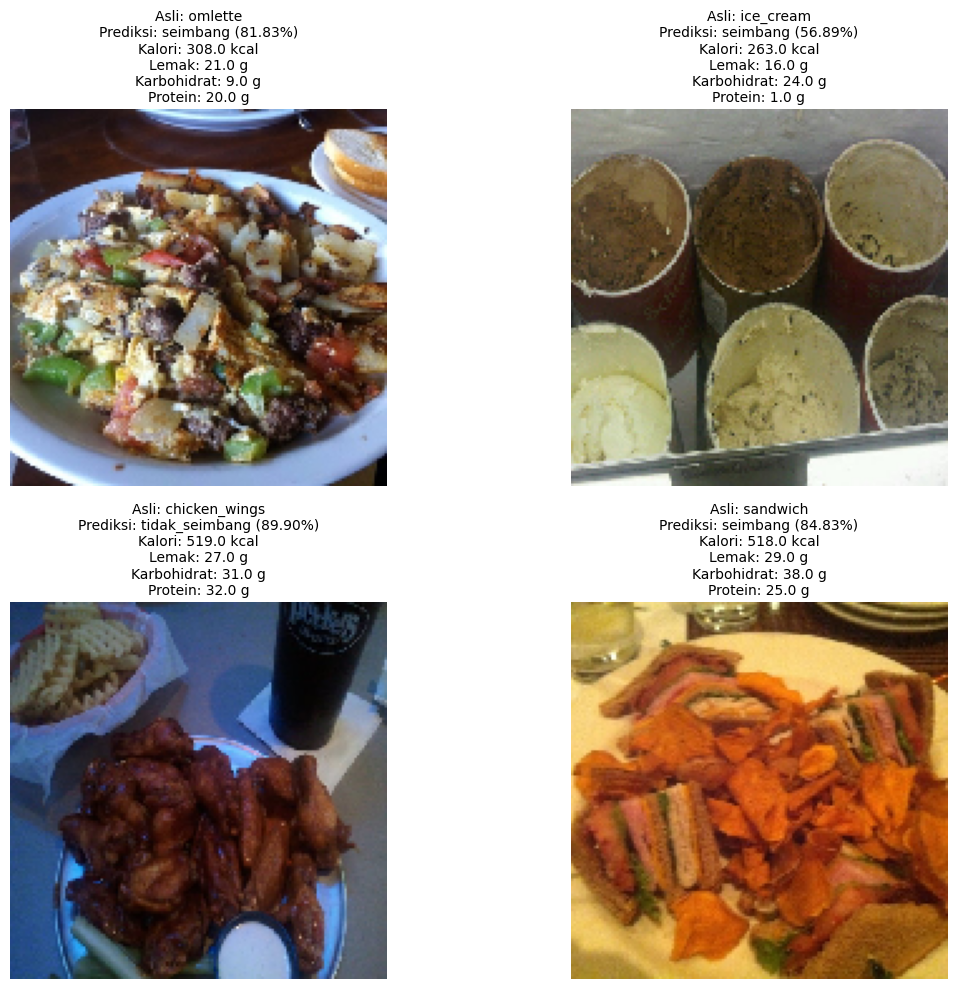

Pemetaan eksplisit: omlette -> omelette
Pencocokan langsung ditemukan untuk: omelette

Makanan: omlette
Prediksi: seimbang (81.83%)
Informasi gizi: {'Calories (kcal)': 308.0, 'Fat (g)': 21.0, 'Carbs (g)': 9.0, 'Protein (g)': 20.0}
Pencocokan langsung ditemukan untuk: ice_cream

Makanan: ice_cream
Prediksi: seimbang (56.89%)
Informasi gizi: {'Calories (kcal)': 263.0, 'Fat (g)': 16.0, 'Carbs (g)': 24.0, 'Protein (g)': 1.0}
Pencocokan langsung ditemukan untuk: chicken_wings

Makanan: chicken_wings
Prediksi: tidak_seimbang (89.90%)
Informasi gizi: {'Calories (kcal)': 519.0, 'Fat (g)': 27.0, 'Carbs (g)': 31.0, 'Protein (g)': 32.0}
Pemetaan eksplisit: sandwich -> club_sandwich
Pencocokan langsung ditemukan untuk: club_sandwich

Makanan: sandwich
Prediksi: seimbang (84.83%)
Informasi gizi: {'Calories (kcal)': 518.0, 'Fat (g)': 29.0, 'Carbs (g)': 38.0, 'Protein (g)': 25.0}


In [ ]:
# Menampilkan DataFrame gabungan
if combined_nutrition_data is not None:
    print("\nInformasi DataFrame Gabungan:")
    print(combined_nutrition_data.info())
    print("\nKolom DataFrame Gabungan:", list(combined_nutrition_data.columns))
    print("\nContoh data gizi (5 baris pertama) untuk DataFrame gabungan:")
    print(combined_nutrition_data.head())
else:
    print("\nError: DataFrame gabungan tidak tersedia.")

# Label mapping
labels = ["seimbang", "tidak_seimbang"]

# Path ke gambar untuk tiap kelas
image_paths = {
    "omlette": "/content/food41_data/images/omelette/1029915.jpg",
    "ice_cream": "/content/food41_data/images/ice_cream/102595.jpg",
    "chicken_wings": "/content/food41_data/images/chicken_wings/1012615.jpg",
    "sandwich": "/content/food41_data/images/club_sandwich/1029932.jpg"
}

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path='/content/tflite/model.tflite')
interpreter.allocate_tensors()

# Prediksi dan visualisasi
plt.figure(figsize=(12, 10)) # Adjusted figure size
for i, (label_name, img_path) in enumerate(image_paths.items()):
    # Jalankan inferensi
    img, predicted_label, confidence, predicted_category, nutrition_info = predict_tflite_nutrition(
        interpreter, img_path, label_name, combined_nutrition_dict, labels
    )

    # Visualisasi
    plt.subplot(2, 2, i + 1) # Changed to 2 rows, 2 columns
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Asli: {label_name}\n"
              f"Prediksi: {predicted_label} ({confidence*100:.2f}%)\n"
              f"Kalori: {nutrition_info['Calories (kcal)']} kcal\n"
              f"Lemak: {nutrition_info['Fat (g)']} g\n"
              f"Karbohidrat: {nutrition_info['Carbs (g)']} g\n"
              f"Protein: {nutrition_info['Protein (g)']} g",
              fontsize=10)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

# Cetak hasil untuk konfirmasi
for label_name, img_path in image_paths.items():
    _, predicted_label, confidence, _, nutrition_info = predict_tflite_nutrition(
        interpreter, img_path, label_name, combined_nutrition_dict, labels
    )
    print(f"\nMakanan: {label_name}")
    print(f"Prediksi: {predicted_label} ({confidence*100:.2f}%)")
    print(f"Informasi gizi: {nutrition_info}")